<a href="https://colab.research.google.com/github/spribylova/Python-Elliptic-Data/blob/main/elliptic_envelope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the needed libraries
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [ ]:
# 1. identify if the point will be an outlier

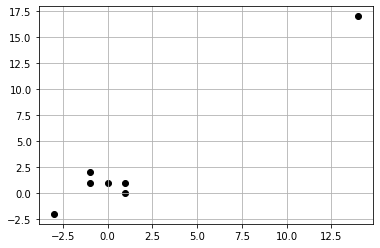

In [23]:
# define a new train dataframe
df = pd.DataFrame(np.array([[0,1], [1,1], [-3,-2], [-1,1], [1,0], [-1,2], [14,17]]), columns = ["x", "y"], index = [0,1,2,3,4,5,6])

#  plot the train data
plt.scatter(df["x"], df["y"], color = "k")
plt.grid()

In [24]:
# convert dataframe to arrays
data = df[['x', 'y']].values

In [25]:
# use elliptic envelope to train the model and identify outliers
# contamination - the proportion of values identified as outliers, between 0 and 0.5
model = EllipticEnvelope(contamination = 0.2) # 20% data must be defined as outlier

# fit model
model.fit(data)

EllipticEnvelope(contamination=0.2)

In [32]:
# test new data points and decide if the point is outlier
decide = np.array([[22,15], [2,-1], [-1,1], [1,-1]])

# use the trained model to predict on new data (negative - data point is outlier, positive - data point is not outlier)
pred = model.predict(decide)
print(pred) # point 22,15 is an outlier based on the robust envelope model train

[-1  1  1  1]


In [63]:
# 2. contour (empirical) versus robust (min covariance) elliptic envelope - random points generation

([], [])

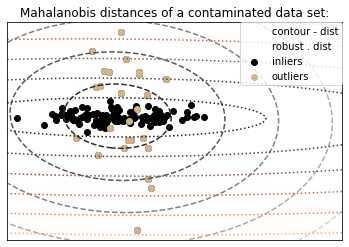

In [65]:
# compare mahalanobis distances for contour versus robust envelope

from sklearn.covariance import EmpiricalCovariance, MinCovDet

n_samples = 125
n_outliers = 25
n_features = 2

# generate data
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)

# Show data set
subfig1 = plt.gca()
inlier_plot = subfig1.scatter(X[:, 0], X[:, 1],color='black', label='inliers')
outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],color='tan', label='outliers')
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.gray,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.copper, linestyles='dotted')

subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot, outlier_plot],
               ['contour - dist', 'robust . dist', 'inliers', 'outliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())


In [ ]:
# use the random X vector to identify the outlier

In [66]:
# predict if the point is or is not an outlier if we want to have ~10% outliers in data set
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(X)
pred = ee.predict(X)
print(pred)
print(np.mean(pred == -1))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1
 -1  1 -1 -1 -1]
0.104


In [88]:
# 3. elliptic envelope - compare train and test for given contamination

Text(0.5, 0.98, '90% Train and 10% Test Blobs')

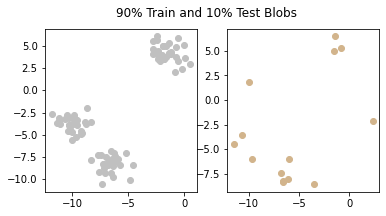

In [89]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(1, 2, figsize=(6, 3))
X, y = make_blobs(random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, random_state=0)

rng = np.random.RandomState(5)

X_train_noise = np.vstack([X_train, rng.uniform(X_train.min(), X_train.max(), size=(3, 2))])
y_train_noise = np.hstack([np.zeros_like(y_train), [1, 1, 1]])

ax[0].scatter(X_train[:, 0], X_train[:, 1],color='silver')

X_test_noise = np.vstack([X_test, rng.uniform(X_test.min(), X_test.max(), size=(4, 2))])
y_test_noise = np.hstack([np.zeros_like(y_test), [1, 0, 1, 1, 1]])

ax[1].scatter(X_test_noise[:, 0], X_test_noise[:, 1],color='tan')

plt.suptitle("90% Train and 10% Test Blobs")

[[-7.46576038e+00 -7.32922249e+00]
 [-1.86845414e+00  4.99311306e+00]
 [-2.18773166e+00  3.33352125e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-9.20490564e+00 -4.57687928e+00]
 [-1.92744799e+00  4.93684534e+00]
 [-6.81608302e+00 -8.44986926e+00]
 [-1.03729975e+01 -4.59207895e+00]
 [-1.85139546e+00  3.51886090e+00]
 [-2.76017908e+00  5.55121358e+00]
 [-1.12277706e+01 -3.40281105e+00]
 [-6.56169737e+00 -6.86000222e+00]
 [-9.76761777e+00 -3.19133737e+00]
 [-9.25715605e+00 -4.90704915e+00]
 [-6.53541686e+00 -8.01552689e+00]
 [-2.77687025e+00  4.64090557e+00]
 [-6.38481234e+00 -8.47302970e+00]
 [ 8.52518583e-02  3.64528297e+00]
 [-9.83767543e+00 -3.07717963e+00]
 [-6.19599603e+00 -7.40281646e+00]
 [-9.81115111e+00 -3.54329690e+00]
 [-5.27930518e-01  5.92630669e+00]
 [-5.90454361e+00 -7.78373539e+00]
 [-1.83198811e+00  3.52863145e+00]
 [-6.40583239e+00 -9.78066645e+00]
 [-1.35938959e+00  4.05424002e+00]
 [-1.03415662e+01 -3.90975169e+00]
 [-1.06177133e+01 -3.25531651e+00]
 [-1.00223295e+01 -4

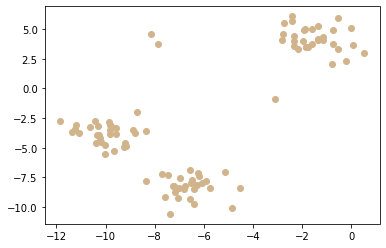

In [92]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(X_train_noise)
pred = ee.predict(X_train_noise)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1],color='tan')
print(X_train_noise)
print(pred)# e.g. the fourth data point is outlier, ...
print(np.mean(pred ==-1))

(-6.0, -2.0)

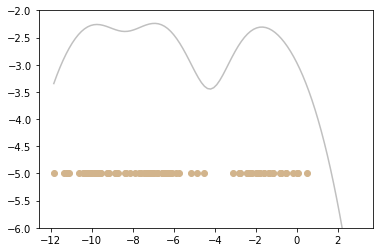

In [76]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity().fit(X_train_noise[:, :1])

line = np.linspace(X_train_noise.min(), 3, 100)
line_density = kde.score_samples(line[:, np.newaxis])

plt.plot(line, line_density, color='silver')
plt.plot(X_train_noise[:, 0], -5 * np.ones(X_train_noise.shape[0]), 'o', color='tan')
plt.ylim(-6, -2)

In [86]:
# compare outliers algorithm methodology performance

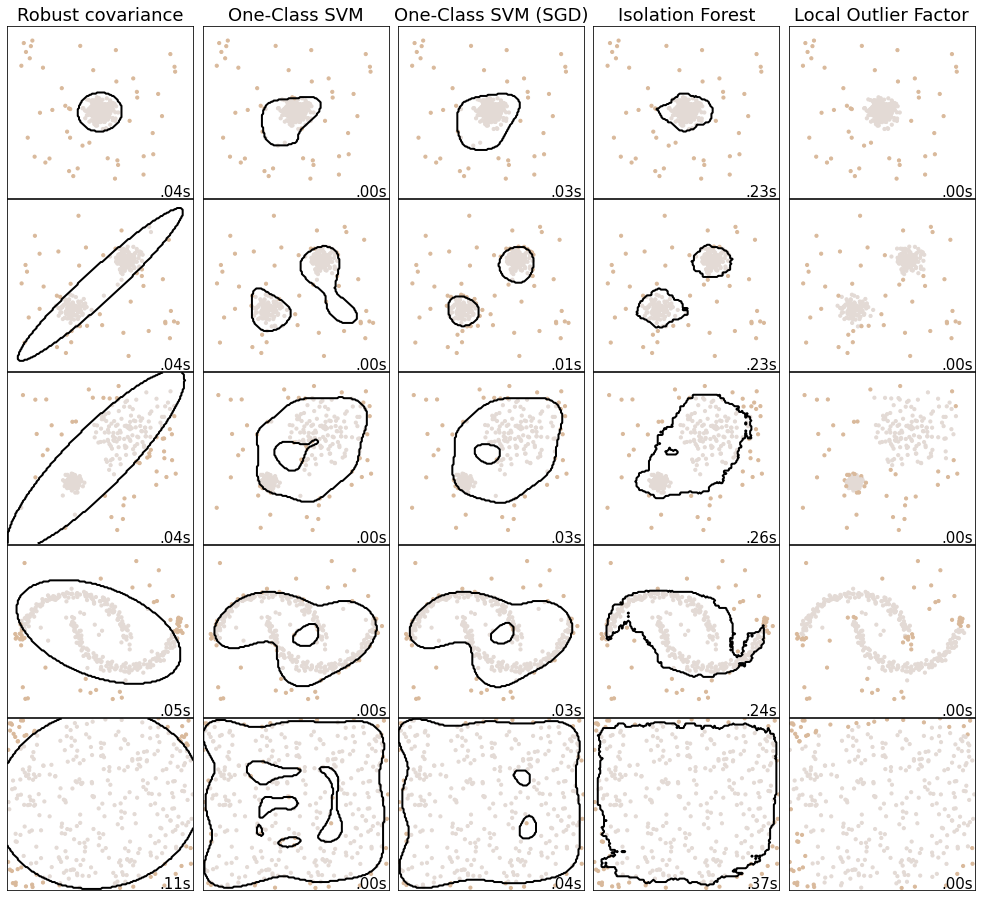

In [85]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs

from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# Example settings

n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared.
# the SGDOneClassSVM must be used in a pipeline with a kernel approximation
# to give similar results to the OneClassSVM
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(contamination=outliers_fraction, random_state=42),
    ),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
    ),
]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points, data ravel array is the same, only black line is different
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

        colors = np.array(["#d9b99b", "#E3DAD5"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

In [87]:
print(anomaly_algorithms)

[('Robust covariance', EllipticEnvelope(contamination=0.15, random_state=42)), ('One-Class SVM', OneClassSVM(gamma=0.1, nu=0.15)), ('One-Class SVM (SGD)', Pipeline(steps=[('nystroem',
                 Nystroem(gamma=0.1, n_components=150, random_state=42)),
                ('sgdoneclasssvm',
                 SGDOneClassSVM(nu=0.15, random_state=42, tol=1e-06))])), ('Isolation Forest', IsolationForest(contamination=0.15, random_state=42)), ('Local Outlier Factor', LocalOutlierFactor(contamination=0.15, n_neighbors=35))]
